# Iris Species Analysis

The Iris dataset was used in R.A. Fisher's classic 1936 paper, The Use of Multiple Measurements in Taxonomic Problems, and can also be found on the UCI Machine Learning Repository.
It includes three iris species with 50 samples each as well as some properties about each flower. One flower species is linearly separable from the other two, but the other two are not linearly separable from each other.

[Kaggle - Iris Species](https://www.kaggle.com/uciml/iris)

## Dataset

This dataset is not divided into subsets (e.g. test or train sets). The columns available are:
- Id
- SepalLengthCm
- SepalWidthCm
- PetalLengthCm
- PetalWidthCm
- Species

## Setup

In [1]:
%matplotlib inline

import time
import numpy as np # linear algebra
import pandas as pd # data processing
import matplotlib.pyplot as plt # data visualization
import seaborn as sns # data visualization
from sklearn.preprocessing import LabelEncoder

# Models
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC # Support Vector Machines (SVM)
from sklearn.naive_bayes import GaussianNB # Naive Bayes
from sklearn import neighbors # KNN
from sklearn.ensemble import RandomForestRegressor # Random Forests
from sklearn.tree import DecisionTreeRegressor # Decision Trees

## Data Processing

In [2]:
df = pd.read_csv('Iris.csv', low_memory = False)

In [3]:
df.shape

(150, 6)

In [4]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
Id               150 non-null int64
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), int64(1), object(1)
memory usage: 7.1+ KB


In [6]:
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [7]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Data Visualization

C:\Users\oandr\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


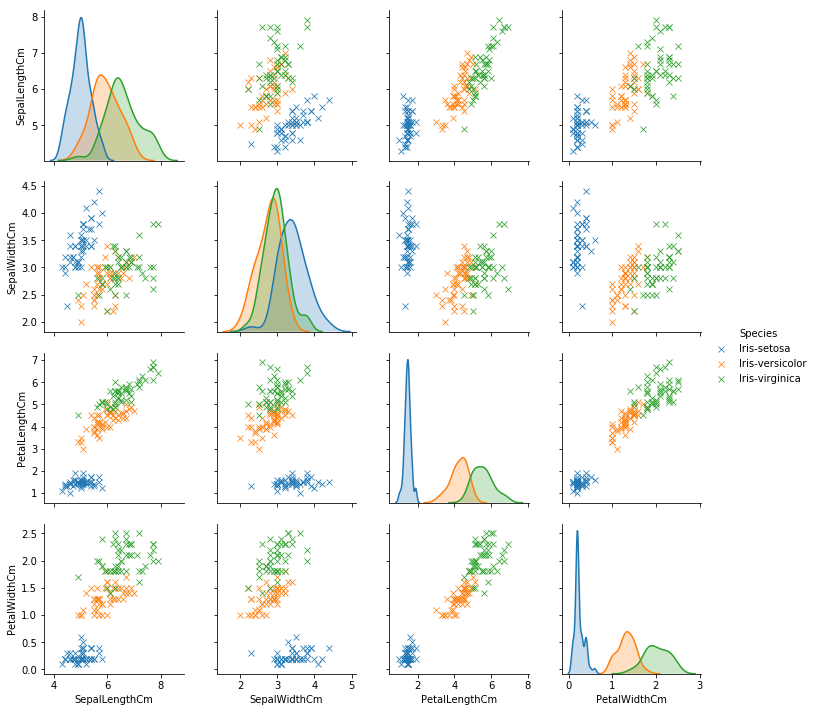

In [8]:
df_viz = df.drop('Id', axis=1)
sns.pairplot(df_viz, hue="Species", markers = 'x')

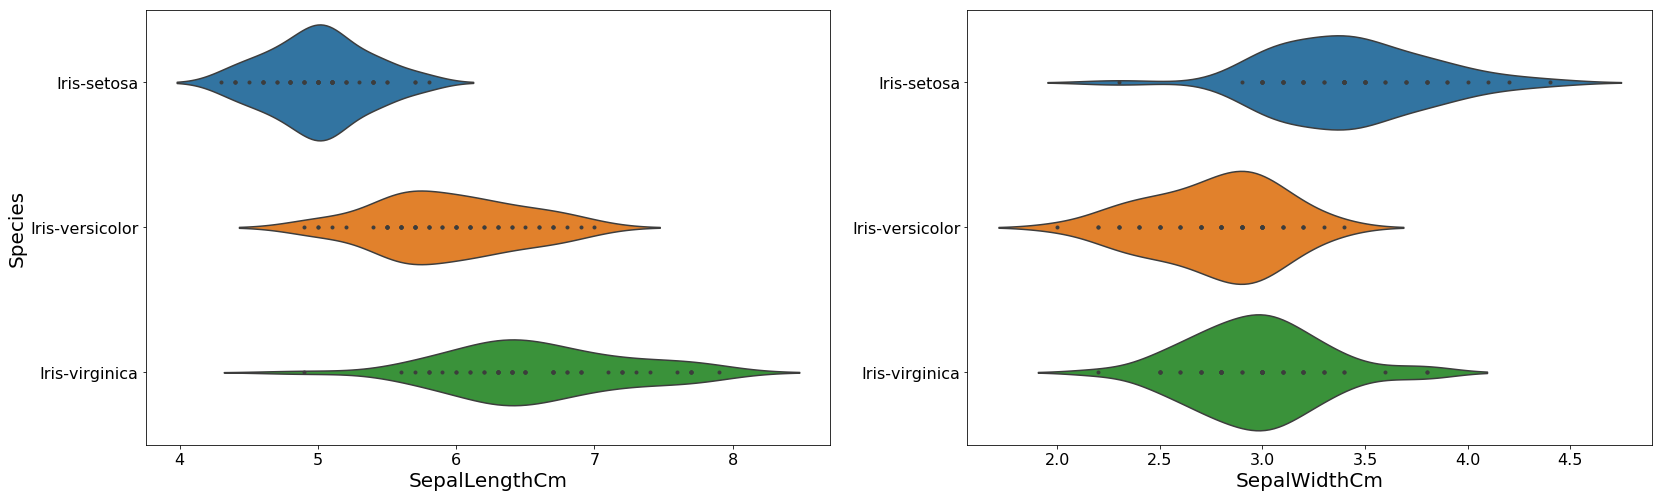

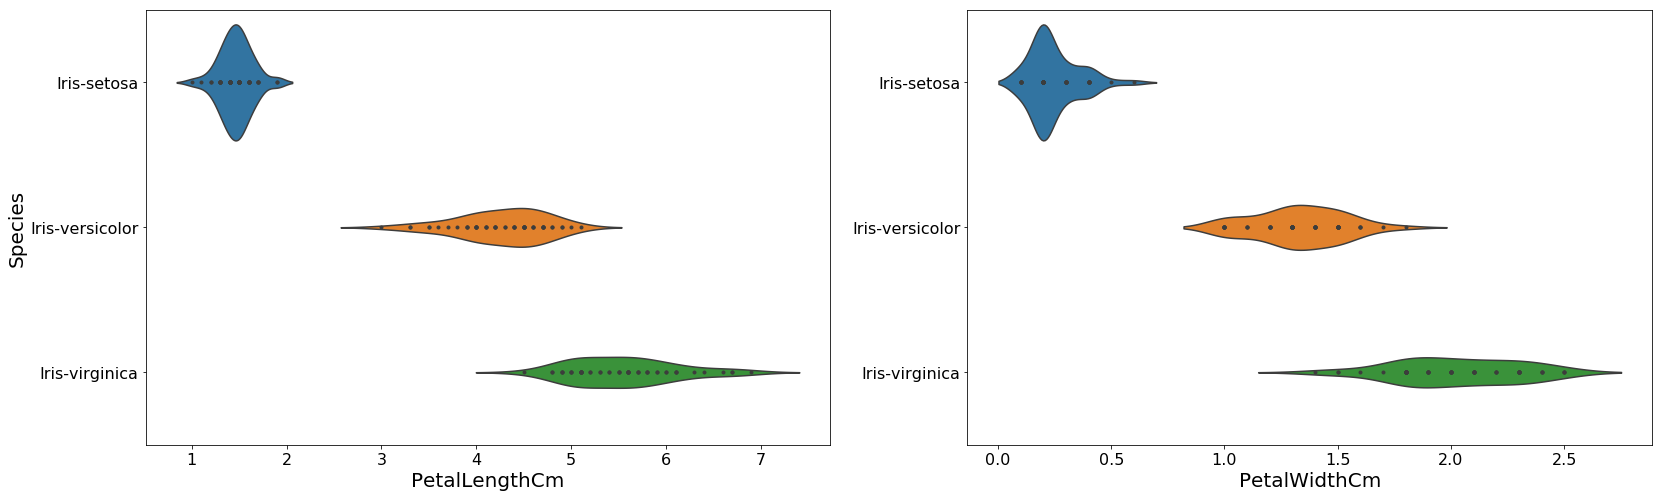

In [9]:
f, ax = plt.subplots(1,2,figsize=(27, 8))

a = sns.violinplot(y="Species", x="SepalLengthCm", data=df, palette="tab10", inner="points", ax = ax[0])
#a.axes.set_title("Title",fontsize=50)
a.set_ylabel("Species",fontsize=20)
a.set_xlabel("SepalLengthCm",fontsize=20)
a.tick_params(labelsize=16)
#sns.plt.show()

b = sns.violinplot(y="Species", x="SepalWidthCm", data=df, palette="tab10", inner="points", ax = ax[1])
#a.axes.set_title("Title",fontsize=50)
b.set_ylabel("",fontsize=20)
b.set_xlabel("SepalWidthCm",fontsize=20)
b.tick_params(labelsize=16)
#sns.plt.show()


f, axx = plt.subplots(1,2,figsize=(27, 8))

c = sns.violinplot(y="Species", x="PetalLengthCm", data=df, palette="tab10", inner="points", ax = axx[0])
#a.axes.set_title("Title",fontsize=50)
c.set_ylabel("Species",fontsize=20)
c.set_xlabel("PetalLengthCm",fontsize=20)
c.tick_params(labelsize=16)
#sns.plt.show()


d = sns.violinplot(y="Species", x="PetalWidthCm", data=df, palette="tab10", inner="points", ax = axx[1])
#a.axes.set_title("Title",fontsize=50)
d.set_ylabel("",fontsize=20)
d.set_xlabel("PetalWidthCm",fontsize=20)
d.tick_params(labelsize=16)
#sns.plt.show()

In [10]:
# Turn features into numeric values
label_make = LabelEncoder()
df['species_code'] = label_make.fit_transform(df['Species'])

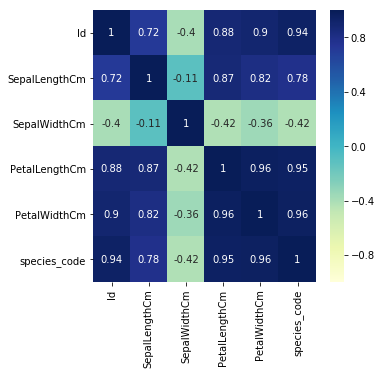

In [16]:
correlation_matrix = df.corr()
f, ax = plt.subplots(figsize=(5, 5))

sns.heatmap(correlation_matrix, annot=True, vmin=-1, cmap='YlGnBu')

## Model

In [30]:
#df_ml = df[['Species','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
df_ml = df[['species_code','SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]

In [32]:
#X = df_ml.drop(['Species'], axis=1)
X = df_ml.drop(['species_code'], axis=1)
#y = df_ml['Species']
y = df_ml['species_code']

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4,random_state=5)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(90, 4)
(90,)
(60, 4)
(60,)


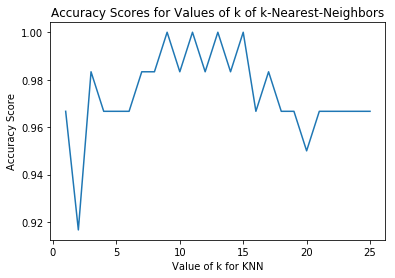

In [34]:
k_range = list(range(1,26))
scores = []


for k in k_range:
    knn = neighbors.KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))

# print(max.k_range)
# print(max.scores) 
plt.plot(k_range, scores)
plt.xlabel('Value of k for KNN')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Scores for Values of k of k-Nearest-Neighbors')
plt.show()

In [40]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
score_gnb = metrics.accuracy_score(y_test, y_pred)
mae_gnb = mean_absolute_error(y_test, y_pred)
print(score_gnb)
#print(mae_gnb)

0.9666666666666667


In [36]:
dt = DecisionTreeRegressor(random_state=1)
dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
score_dt = metrics.accuracy_score(y_test, y_pred.round())
#mae_dt = mean_absolute_error(y_test, y_pred)
print(score_dt)
#print(mae_dt)

0.95


In [39]:
rf = RandomForestRegressor(random_state=1)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
score_rf = metrics.accuracy_score(y_test, y_pred.round())
#mae_rf = mean_absolute_error(y_test, y_pred)
print(score_rf)
# print(mae_rf)

0.9666666666666667


C:\Users\oandr\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
